In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, levene, ttest_ind, f_oneway, chi2_contingency, pearsonr
from math import sqrt
import seaborn as sns
import statsmodels.api as sm

C:\Users\alima\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading the Main Dataframe

In [8]:
df = pd.read_csv('C:/Career/Learning/IBM Statistics/boston_housing.csv')
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# TASK 4

## Part 1


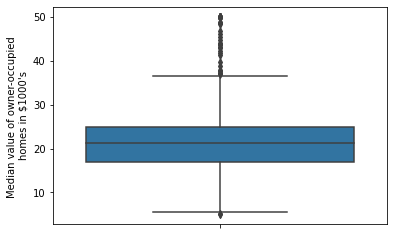

In [15]:
ax = sns.boxplot(y = "MEDV", data = df)
ax.set_ylabel("Median value of owner-occupied \nhomes in $1000's")
plt.show()

## Part 2

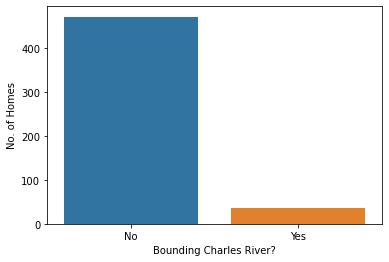

In [16]:
ax = sns.countplot(x = 'CHAS', data = df)
ax.set_xlabel("Bounding Charles River?")
ax.set_ylabel("No. of Homes")
ax.set_xticklabels(["No", "Yes"])
plt.show()


# Part 3


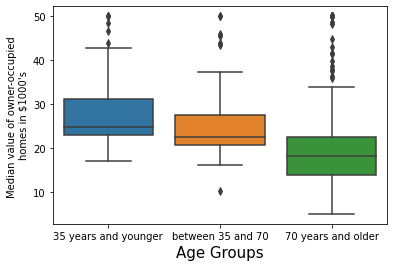

In [17]:
df.loc[(df['AGE'] <= 35), 'age_group'] = '35 years and younger'
df.loc[(df['AGE'] > 35) & (df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
df.loc[(df['AGE'] >= 70), 'age_group'] = '70 years and older'

box_order= ['35 years and younger', 'between 35 and 70', '70 years and older']

ax = sns.boxplot(y = "MEDV", x = 'age_group', data = df, order = box_order)
ax.set_ylabel("Median value of owner-occupied \nhomes in $1000's")
ax.set_xlabel("Age Groups", size = 15)
plt.show()

## Part 4

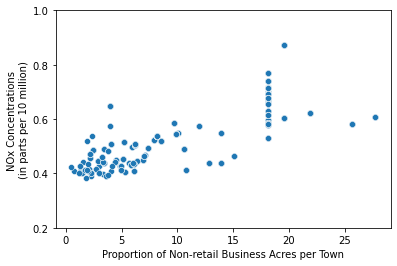

In [18]:
ax = sns.scatterplot(x = "INDUS", y = "NOX", data = df)
ax.set_ylabel("NOx Concentrations \n(in parts per 10 million)")
ax.set_xlabel("Proportion of Non-retail Business Acres per Town")
ax.set_yticks(np.arange(0.2, 1.2, 0.2))
plt.show()

## Part 5

[Text(0.5, 0, 'Distribution of Pupil-Teacher Ratio'),
 Text(0, 0.5, 'Frequency')]

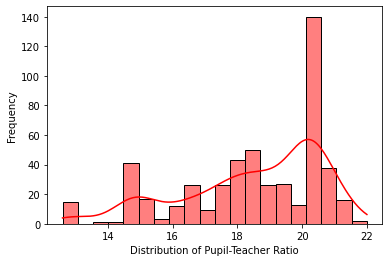

In [20]:
ax = sns.histplot(df['PTRATIO'],
                  bins=20,
                  kde=True,
                  # hist_kws={"color": "green", "linewidth": 15,'alpha':1},
                  color='red'
                  )
ax.set(xlabel='Distribution of Pupil-Teacher Ratio', ylabel='Frequency')

# TASK 5

## Part 1
#### Hyothesis: There is no influece of bounding to the river on the asset values
#### Conclusion: As p < 0.05, we reject the null hyothesis, therefore, bounding to the river significantly influence the prices


In [21]:
p_q1 = ttest_ind(df[df['CHAS'] == 0]['MEDV'],
                 df[df['CHAS'] == 1]['MEDV'], equal_var = True)[1]
p_q1

7.390623170519905e-05

## Part 2
#### Hyothesis: There is no influece by the age range on the asset values
#### Conclusion: As p < 0.05, we reject the null hyothesis, therefore, age range of the asset significantly influences its prices

In [22]:
p_q2 = f_oneway(df[(df['AGE'] <= 35)]['MEDV'],
                df[(df['AGE'] > 35)& (df['AGE'] < 70)]['MEDV'],
                df[(df['AGE'] >= 70)]['MEDV'])[1]
p_q2

1.7105011022702984e-15

# Part 3
#### Hyothesis: There is no correlation between the Nox concentration and the weighted distance to the Boston employment centres
#### Conclusions: There is a statsitically significant corelation between the NOx concentration and weighted distance to employment
#### centres (p<0.05). This correlation is relatively strong due to 0.76 as the correlation coeffieicnt. 


In [24]:
p_q3 = pearsonr(df['INDUS'], df['NOX'])[1]
p_r = pearsonr(df['INDUS'], df['NOX'])[0]
(p_r, p_q3)

(0.7636514469209151, 7.913361061238693e-98)

# Part 4
#### Hyothesis: There is no correlation between the home values and the weighted distance to the Boston employment centres
#### Conclusions: There is a statsitically significant corelation between the home values and weighted distance to employment
#### centres (p<0.05). However, this correlation is relatively weak due to r2 of 0.062 (r of 0.25). 


In [26]:
X = df['DIS']
y = df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

C:\Users\alima\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        22:33:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""